<a href="https://colab.research.google.com/github/ArashVafa/ISTM660/blob/master/Text_Analytics_Uber_Reviews_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

This project outlines a text-mining classification model using bag-of-words and logistic regression. We will attempt to understand the relationship between Uber text reviews and ride ratings. This is a great place to start if you’re relatively new to unstructured data analysis, yet have some experience with statistics and/or other classification experience.


Data Source: [Kaggle](https://www.kaggle.com/purvank/uber-rider-reviews-dataset/data) by user *Purvank*




*   Preliminary Analysis
*   Formatting / Converting Text
*   Logistic Regression
*   Testing / Conclusions



**Preliminary Analysis**

Import Data
First let’s bring in the data and visualize the dataframe:

In [0]:
#@title Importing Modules
#importing modules
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import random

In [46]:
#@title Load data
url = 'https://raw.githubusercontent.com/ArashVafa/ISTM660/master/Uber_Ride_Reviews.csv'

# Load data into a pandas dataframe
df = pd.read_csv(url)
df.head()

,ride_review,ride_rating,sentiment
0,I completed running New York Marathon requeste...,1.0,0
1,My appointment time auto repairs required earl...,1.0,0
2,Whether I using Uber ride service Uber Eats or...,1.0,0
3,Why hard understand I trying retrieve Uber cab...,1.0,0
4,I South Beach FL I staying major hotel ordered...,1.0,0


In [5]:
#@title Code to import a file from your computer
from google.colab import files
uploaded = files.upload()

Saving Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv to Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19 (1).csv


In [0]:
#@title Code to import file from colab files (Example 2)
df = pd.read_csv('data.csv')
df.head()

In [15]:
#@title Choosing apprpiate columns
df2 = df[['reviews.text', 'reviews.rating']] 
df = df2

,reviews.text,reviews.rating
0,I order 3 of them and one of the item is bad q...,3
1,Bulk is always the less expensive way to go fo...,4
2,Well they are not Duracell but for the price i...,5
3,Seem to work as well as name brand batteries a...,5
4,These batteries are very long lasting the pric...,5


It’s a straightforward dataset. We have the “ride_review” text column and the “ride_rating” column (which ranges from 1 as the lowest rating and 5 as the highest). Users write these text reviews to describe their experience and the categorical 5 star rating summarizes it.

**Basic Statistics**

Let’s check the .describe() method to see how many instances we’re dealing with and other basic statistics:

In [47]:
df.describe()

,ride_rating,sentiment
count,1344.000000,1344.000000
mean,1.627232,0.173363
std,1.296149,0.378702
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,5.000000,1.000000


It appears Uber drivers haven’t performed very well in this sample. The mean is a rating of 1.62, and the 75% mark is a 1 star review! This tells us there are a disproportionate amount of 1 star reviews. Hopefully we can gain insight into this by building a model.

**Purpose of Model**

Having mentioned that, let’s reiterate the utility of the bag of words / logistic regression model we will build:


*   We will be able to gauge the sentiment of future text reviews and categorize them into “Good” or “Bad” classes.
*   We will be able to pinpoint specific words with a high impact on rating sentiment. This information could be an asset for Uber (if used for their entire internal dataset — not this small sample we have). For example, the word “rude” likely has a negative coefficient, pushing our classifier to label that review as bad. The word “great” likely has a positive coefficient, pushing our classifier to label that review as good. The goal is discovery. We don’t know what interesting words may appear to have an impact on sentiment, and that’s the fun part. Does the word “great” outweigh “horrible” and net positive or negative? Many questions like this will be answered with our model.



**Null Check**

Moving on, let’s check for null values in the dataset:

In [48]:
#checking for nulls
null_count = df.isnull().sum()
null_count

ride_review    0
ride_rating    0
sentiment      0
dtype: int64

None this time. If we had some nulls, we would need to explore how to deal with those. Many good resources exist on this topic you can research.

**Distributions**

Next, let’s visualize the rating distribution of our data:

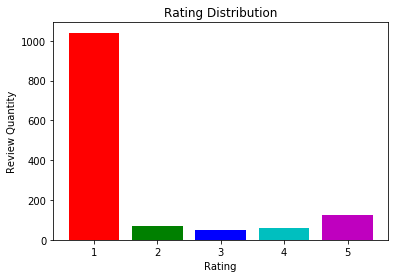

In [49]:
#@title Visualization
#seperating by groups
groups = df.groupby('ride_rating').count()
Values = groups.ride_review
colors = ['r', 'g', 'b', 'c', 'm']
#making bar plot
plt.bar(([1,2,3,4,5]), Values, color= colors)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Review Quantity')
plt.show()

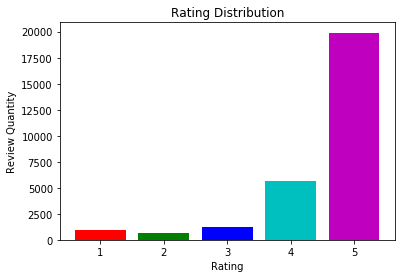

In [29]:
#@title Second Example 
#seperating by groups
df.columns = ['reviews','ratings']
groups = df.groupby('ratings').count()
Values = groups.reviews
colors = ['r', 'g', 'b', 'c', 'm']
#making bar plot
plt.bar(([1,2,3,4,5]), Values, color= colors)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Review Quantity')
plt.show()

**Logistic Regression**

In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc... Each object being detected in the image would be assigned a probability between 0 and 1 and the sum adding to one.



In order to perform the logistic regression later, we need to figure out a way to turn these 5 ratings categories into binary classes (1 and 0). Remember, logistic regression only handles “either/or” target variables. The best way to turn the star ratings into binary classes(in my opinion) is:

Set ratings below 3 stars as class 0 (negative sentiment)

Set ratings above 3 as class 1 (positive sentiment)

Delete the 3 star ratings. 3 stars are neutral and offer no sentiment insight.

So, let’s make a new column that deletes the 3 star ratings and creates a new column which classifies the other ratings into binary classes:

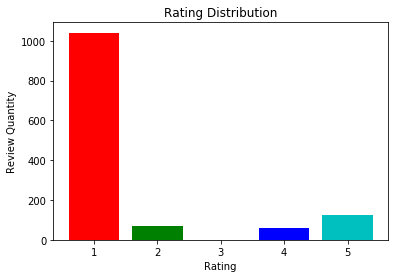

In [50]:
#@title Dropping data that will not help in out modeling
#deleting all instances with ride_rating = 3
df = df[df.ride_rating != 3]
#separating by groups
groups = df.groupby('ride_rating').count()
Values = groups.ride_review
colors = ['r', 'g', 'b', 'c']
#making bar plot
plt.bar(([1,2,4,5]), Values, color= colors)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Review Quantity')
plt.show()

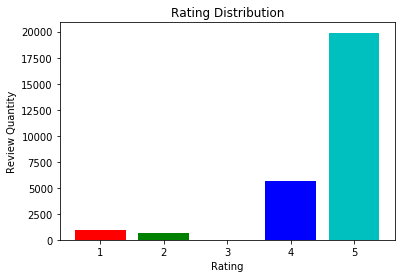

In [30]:
#@title Second Example
#deleting all instances with ride_rating = 3
df = df[df.ratings != 3]
#separating by groups
groups = df.groupby('ratings').count()
Values = groups.reviews
colors = ['r', 'g', 'b', 'c']
#making bar plot
plt.bar(([1,2,4,5]), Values, color= colors)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Review Quantity')
plt.show()

In [51]:
#@title Creating new binary_class column
df['binary_class'] = np.where(df['ride_rating'] > 3, 1, 0)
df

,ride_review,ride_rating,sentiment,binary_class
0,I completed running New York Marathon requeste...,1.0,0,0
1,My appointment time auto repairs required earl...,1.0,0,0
2,Whether I using Uber ride service Uber Eats or...,1.0,0,0
3,Why hard understand I trying retrieve Uber cab...,1.0,0,0
4,I South Beach FL I staying major hotel ordered...,1.0,0,0
...,...,...,...,...
1339,everyone knows uber fast couple drinks night w...,2.0,0,0
1340,For service asks credit card number right bat ...,1.0,0,0
1341,great service hiring drivers know way around t...,2.0,0,0
1342,Uber several problems make poor experience con...,1.0,0,0


In [31]:
#@title Second Example
df['binary_class'] = np.where(df['ratings'] > 3, 1, 0)
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,reviews,ratings,binary_class
1,Bulk is always the less expensive way to go fo...,4,1
2,Well they are not Duracell but for the price i...,5,1
3,Seem to work as well as name brand batteries a...,5,1
4,These batteries are very long lasting the pric...,5,1
5,Bought a lot of batteries for Christmas and th...,5,1
...,...,...,...
28327,I got 2 of these for my 8 yr old twins. My 11 ...,5,1
28328,I bought this for my niece for a Christmas gif...,4,1
28329,"Very nice for light internet browsing, keeping...",5,1
28330,This Tablet does absolutely everything I want!...,5,1


# **Formatting / Converting Text**
**Train/Test Split**

The first step in this process is separating our data into training and testing sets. We will create our model from the training data and save some instances for testing purposes later. We’re using sklearn to shuffle and split. Without messing with the parameters, it should split our data into 75% training and 25% testing.

By calling X_train.shape, we can check this. Further, let’s print a random review to verify it worked and to remind ourselves what we’re working with.

In [52]:
#@title Splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['ride_review'], df['binary_class'], random_state = 0)
#setting random number between 1 and 1000
number = random.randint(1,1000)
#printing random training text and X_train shape
print ('Random Review:')
print(' ')
print(X_train[number])
print(' ')
print('X_train shape: ' + str(X_train.shape))

Random Review:
 
I encountered worst drivers Uber They rude discourteous one left middle road They know handle business customers I think last improve service
 
X_train shape: (970,)


In [36]:
#@title Second Example
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['reviews'], df['binary_class'], random_state = 0)
#setting random number between 1 and 1000
number = random.randint(1,1000)
#printing random training text and X_train shape
print ('Random Review:')
print(' ')
print(X_train[number])
print(' ')
print('X_train shape: ' + str(X_train.shape))

Random Review:
 
Good product at great price!!
 
X_train shape: (20344,)


**Turning words into numbers**

Now comes the exciting part, translating our text data into numerical features. In order to run a regression though this data later, we need to have a feature for every word in our sample. Essentially, we will be translating each word to be assigned as a number and then counting the frequency of these word/numbers used per instance in matrices. The process of doing this is called **“Bag-of-words”**. It’s important to note that the order of words doesn’t matter, bag-of-words only counts the frequency per instance of words used. To start, we will use the Sklearn CountVectorizer

In [53]:
#@title Turning words into numbers
#importing countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
#creating variable which assigns X_train to numbers
vect = CountVectorizer().fit(X_train)
#translates numbers back to text
vect.get_feature_names()[1:10]

['abandoned',
 'ability',
 'able',
 'about',
 'abrupt',
 'absence',
 'absolute',
 'absolutely',
 'absorb']

In [37]:
#@title Second Example
#importing countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
#creating variable which assigns X_train to numbers
vect = CountVectorizer().fit(X_train)
#translates numbers back to text
vect.get_feature_names()[1:10]

['000', '01', '02', '09', '09500043', '0f', '10', '100', '1000']

We can see using the len(vect.get_feature_names()) method, there are a total of 6,607 words in all the reviews:

In [54]:
#length of total words
len(vect.get_feature_names())

6607

Now, let’s transform our X_train data into a matrix which contains the documents (instances) as rows and the count of new features (6,607) as columns. For example, our first word (0) as seen above is “abandoned”. That will be the first column in the matrix. Whichever Uber reviews contain ‘abandoned’ will tally up how many times it was used and add it to that column. As a side note, someone using “abandoned”, will likely have a negative effect on rating. We can experiment later on this.

In [55]:
#@title Creating matrix array for logistic regression
X_train_vectorized = vect.transform(X_train)
print (X_train_vectorized.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Because there are so many words and most reviews only have a small portion of them, most of the numbers in this array will be 0.

**Logistic Regression**

**Building Model**

We finally made it to the regression.
Again, we will be using sklearn to perform this model:

In [56]:
#@title Creating Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Now, we will calculate the AUC to see how well it classifies the test data.

AUC (Area Under The Curve) ROC (Receiver Operating Characteristics)

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between good and bad reviews.

In [57]:
#@title Calculating AUC
from sklearn.metrics import roc_auc_score
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.7567657038814863


This is good. A rough way of understanding this metric is to say we have 75% correctly classified instances.

**Testing / Conclusions**

**Positive and Negative Words**

Let’s delve into which words have the highest impact on class separation. Here we are translating our numbers back into words, getting the coefficients outputted by the regression, adding them both into a dataframe, and sorting them by their coefficient.

In [58]:
#creating array variable of all the words
feature_names = np.array(vect.get_feature_names())
#creating array of all the regression coefficients per word
coef_index = model.coef_[0]
#creating df with both arrays in it
df = pd.DataFrame({'Word':feature_names, 'Coef': coef_index})
#sorting by coefficient
df.sort_values('Coef')

,Word,Coef
913,charged,-1.025996
3820,never,-0.959084
1364,customer,-0.739031
3179,know,-0.674915
240,another,-0.672341
...,...,...
4433,professional,0.903826
6234,used,0.925061
1224,convenient,0.990043
5016,safe,1.030020


**Negative Sentiment:**

This is fascinating to me.

“Charged” is the most negatively correlated word.

“Lyft” I thought was interesting as well. If customers have a negative experience, I’m sure they have a propensity to comment “Your competitor is better than you!”.

“Free” was one that confused me. I would have thought ‘free’ would be a positive-leaning word.

**Positive Sentiment:**

As you move down the dataframe, the words become more positively correlated.

“great” is the highest, with a score so positive, it even outweighs “charged”.

“Safe”, “Convenient”, “Clean”… a lot of these words are intuitively expected.

An unexpected positively correlated word is “she”. Do female drivers have a more positive effect on customer sentiment?

These results can provide potentially invaluable business insight to Uber’s stakeholders and leadership

**Testing custom reviews**

Lastly, we can experiment and test our own custom reviews. In bold below are the inputs and beneath that are the respective outputs (1 = positive; 0 = negative). That last one should easily be a positive, but our classifier labels it as negative. The rest seem accurate.

In [59]:
print(model.predict(vect.transform(['abandoned great'])))
print(model.predict(vect.transform(['Who doesn’t love a clean car? If your driver takes great care of theirs, go ahead and say thanks.'])))
print(model.predict(vect.transform(['great she the best'])))
print(model.predict(vect.transform(['cool, safe, fun'])))
print(model.predict(vect.transform(['charged slow horrible'])))
print(model.predict(vect.transform(['it was as average as a trip could be'])))
print(model.predict(vect.transform(['my family felt safe we got to our destination with ease'])))
print(model.predict(vect.transform(['i got to my destination quickly and affordably i had a smile on my face from start to finish'])))
print(model.predict(vect.transform(['hard, bad, cool'])))

[1]
[1]
[1]
[1]
[0]
[0]
[1]
[0]
[0]
